<a href="https://colab.research.google.com/github/manasdhir/pima-indians-diabetes-classification/blob/main/decision%20trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* this dataset shows the data collected from a prima indians tribe in USA and is to be used to determine the probability of occurence of diabetes in the women of the tribe, this dataset contains information of only the women of the prima indians tribe.

* first we have to obtain an analytics base table for the dataset.
* we should find out what the columns stand for especially if they are in short forms
* then we should apply a filter on our dataset which allows us to look at the values of each column and determine its range.
* then we have to check if the range is correct or if it looks suspicious
* for eg, taking the pregnancy column of this dataset, it has range from 0 to 17.
* the range does look suspiciuos so we will select the records having very high values of pregnancy such as 14,15,17
* one way to check whether this is a typo or not is by checking the age column
* since the range of age for 14-17 pregnancies is from 38-47 which belongs to the higher age group in the age column , this might be true , if the age belonged to the lower age groups we could have considered this to be a typo.
* there is a 0 value as well in the pregnancy column we need to check if it is a missing value or a true value as we have a 0 value in plasma column as well ,which cannot be true as plasma is a property of blood, so the 0 value in plasma column is a missing value,thus we need to check the 0 value in the pregnancy column as well because if there is a missing value in one column why can it not be there in the other column as well.
* there is a 0 value in the blood pressure column as well which is a clear indication of the presence of missing values in the dataset.
* looking at the class column it only has two types of values 0 and 1 where 0 indicates non diabetic and 1 indicated diabetic , this 0 is not a missing value as has been mentioned by the owners of the dataset.
* we do not have any categorical columns in this datset but if they were present we had to verify if the categories were correct or if they were missing values.
* we need to verify the range of the various columns with the help of a domain expert.



#importing libraries

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/datasets/featurization/pima-indians-diabetes.csv")
df1.head(50)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#EDA

In [ ]:
#replacing 0 with nan wherever it does not make any sense
df1[["Plas","Pres","skin","test","pedi","age"]]=df1[["Plas","Pres","skin","test","pedi","age"]].replace(0,np.nan)

In [ ]:
df1.head(50)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,0.0,0.232,54,1


the values could be missing at random or they could be missing according to a certain pattern for eg. sometimes people might not want to share their salaries so the data could be missing or the data could be missing because of our collection technique.values missing at random can be replaced by some other value easily but the values missing due to some reason cannot be replaced that easily.here we assume that the values are missing at random

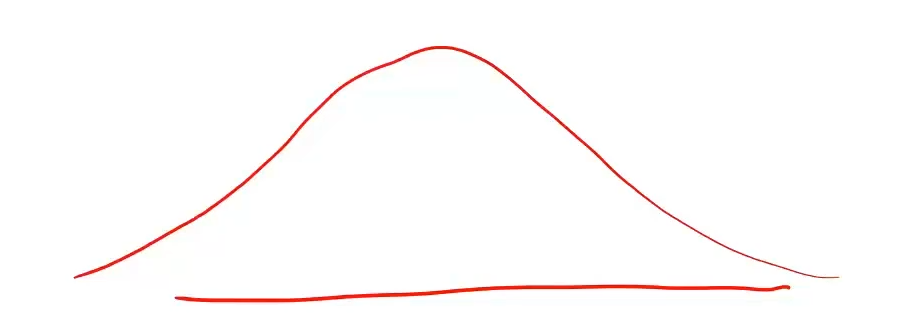

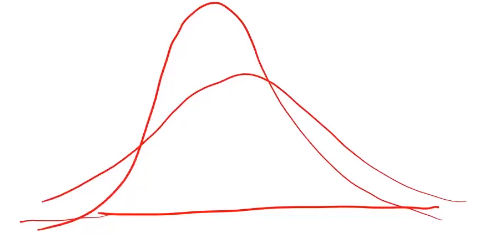

let us consider the above graph shown as a graph before replacing the missing values when the missing values are replaced with the median or the mean the graph becomes sharper towards the center as the variance is reduced in this process thus we bias the dataset a bit when the values are replaced but this is the better option than dropping the entire record with a missing value as we loose a lot of information that way.

sometimes missing values can be predicted from other columns if there is a correlation between them which can be done using MICE package which is not available in open source python yet.

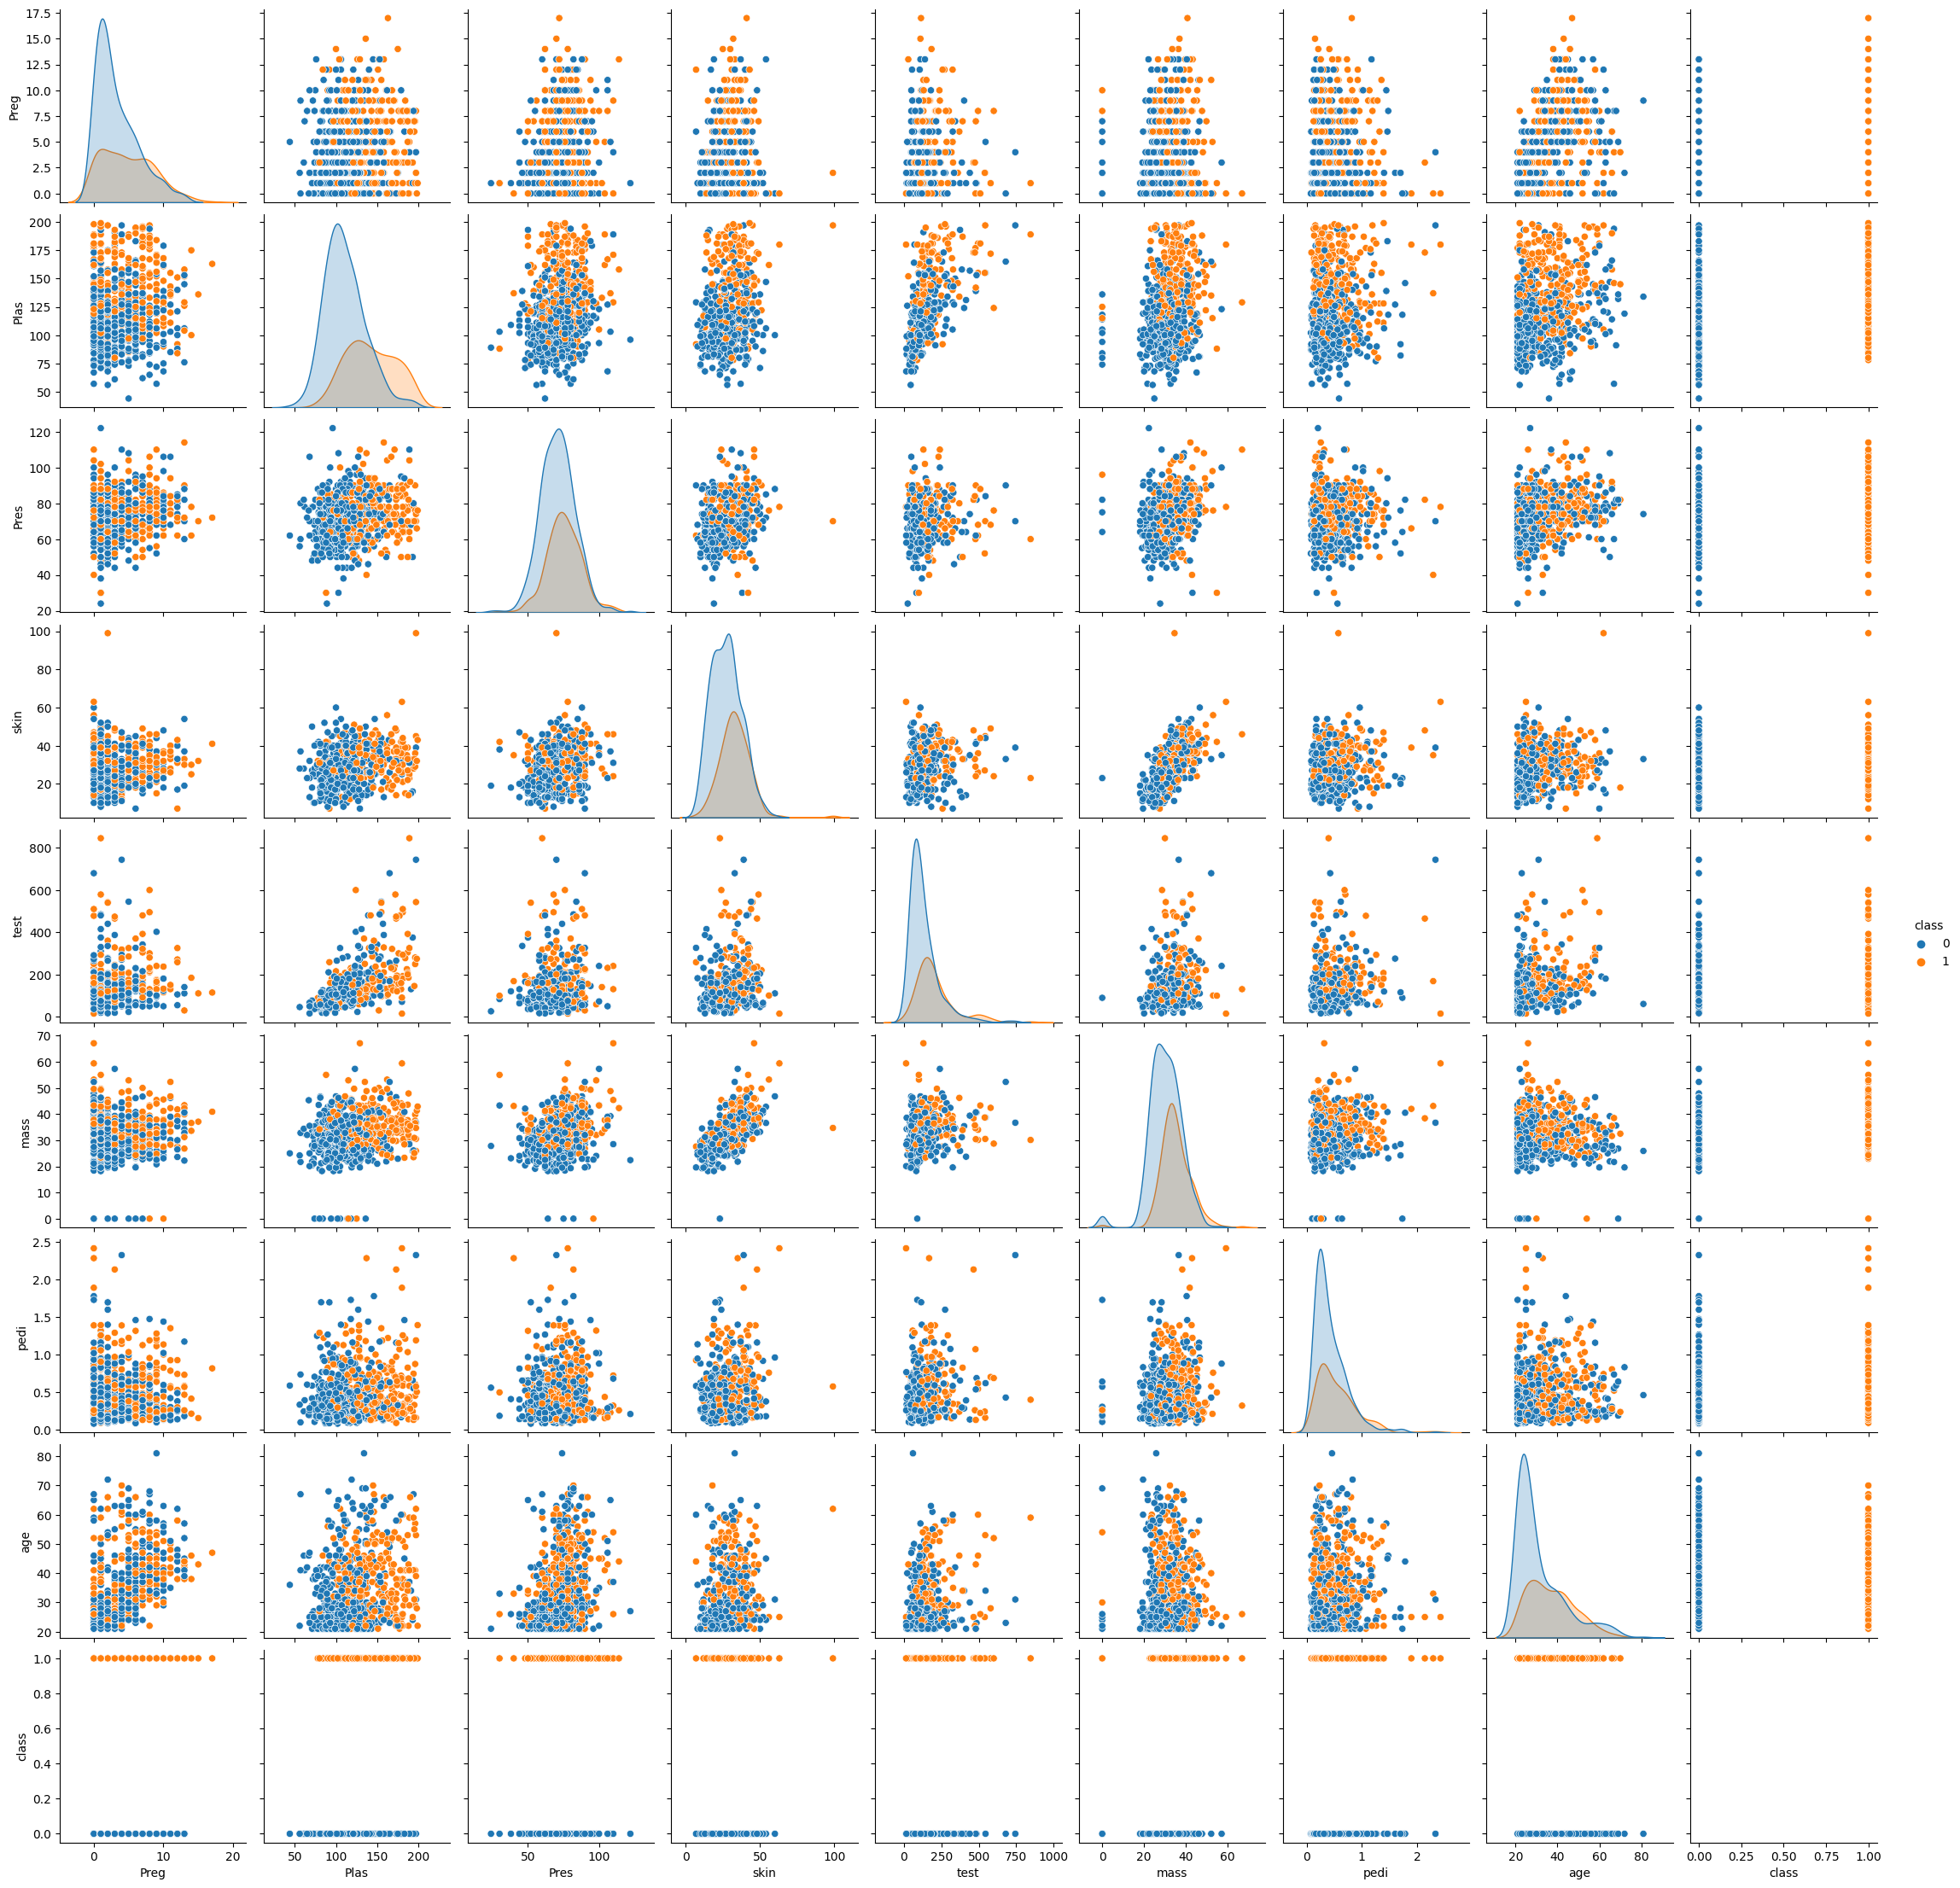

In [ ]:
import seaborn as sns
sns.pairplot(df1,hue="class",diag_kind="kde",vars=["Preg","Plas","Pres","skin","test","mass","pedi","age","class"])#without including the vars argument the class plots will not be displayed.

inferences from pairplot

for diagonal graphs

* in preg column there is a skewed distribution for non diabetic people with tails towards the right side which indicates the presence of outliers in the data.
* for the plasma graph , for non diabetic people there is a normal distribution graph without any skewness
* the plot for blood pressure has an almost normal distribution but there is tail towards left which indicates outliers which are nothing but 0 values.
* the plot for skin shows right side tails for both diabetic and non diabetic people which indicates the presence of extreme values which are very different from the rest of the dataset.
* similarly the test column also shows the presence of outliers with very long right side tails along with a left side skew.

for off diagonal scatterplots

* positive correlation between skin and test.

for "class" graphs

* for class vs pregnancy the range of values is almost same but slightly higher pregnancies are a part of diabetic group however there is not much distinction.
* for class vs plasma the range of values is almost same but slightly lower plasma values belong to the non diabetic group.
* the range of values is same for the blood pressure
* the range of values is also same for skin but there is an outlier present as well we need to check that outlier and from the above inferences we can conclude that the skin column is not a very good predictive for classes.


if there is strong correlation between two values then one of them is a redundant value which means both are giving the same information to your algorithm so you should drop one of them however which one should be dropped is based on domain expertise or both these dimensions could be combined to make a composite dimension.

##splitting into input and output

In [ ]:
val=df1.values
val

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
x=val[:,0:8]
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y=val[:,8]
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

##dealing with missing values

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')#we replace with median instead of mean as median is not effected by outliers but mean is effeted
transx=imputer.fit_transform(x)

In [ ]:
transx

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
test_size=0.30 # for splitting training and testing data into 70:30 ratio
seed=7 # random seed for repeatability of the code
trainx,testx,trainy,testy=train_test_split(transx,y,test_size=test_size,random_state=seed)

outliers are values that are very different from the rest of the data.

* Most common cause of outliers can be typos,such as writing 5.5 feet as 55 feet.
* another reason could be the mixing up of data which was to be used for different processes , this is known as mixing up of gaussians.such as in the auto mpg dataset the dataset contained data for different types of cars:small cars,medium sized cars and large sized cars, so making one single model for all types of cars does not make sense.This is known as mixing up of gaussians which increases the spread of the graph , makes the central value less reliable and causes the dataset to become less representative ie. the dataset no longer represents small cars,medium cars or the big cars.This can be found out using diagonal pairplots if there are a lot of peaks and valleys in your plots then you might have mixed up the gaussians so try separating them and creating different models, however this is situation specific.
* another reason for outliers is that it can be a possible rare case for the data, in such cases we can either drop the record with the outlier or replace it with some other value such as central values
* mathematical technique of determining outliers is all values out of the range x'+-2sd is considered as outliers , the value of standard deviation can be taken as either 2,3 or any other number.
* when outliers are replaced with central values the dataset gets biased towards the centre this leads to the generation of more outliers.
* we can use a method known as capping which replaces the datapoints near the end of the range with the end of the range of the space we are willing to take.
* however the number of outliers should be less as if a lot of outliers are replaced by two standard deviations then this can lead to the rise of a new distribution. the distribution should not have a lot of peaks and valleys after replacing.
* the outliers can also be replaced with predicted or calculated values.


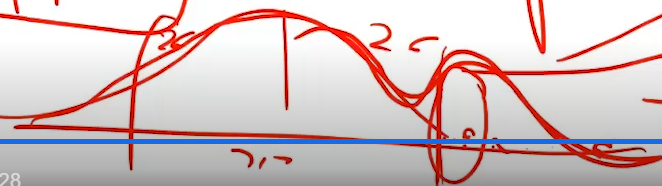


we can also use IterativeImputer() from the fancy impute library which determines the missing values by using regression techniques from other variables.

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=b7c3c783312942ed2c50ade9f698d9e026ce6ea22e70aa025dfea3751273eae1
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=b95ea231e376f700660f71779145faa958a74578af6fb992ba342ee0c981cec3
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import fancyimpute
imputer = fancyimpute.IterativeImputer(verbose=0)
transx1 = imputer.fit_transform(x)

transx1

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

#checking and dealing with outliers

In [ ]:
transx1=pd.DataFrame(transx1,columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])
transx1.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.000000,218.859878,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,70.341782,26.6,0.351,31.0
2,8.0,183.0,64.0,22.308657,268.753458,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [ ]:
q1=transx1.quantile(0.25)
q3=transx1.quantile(0.75)
IQR=q3-q1
IQR

preg      5.000000
plas     41.250000
pres     16.000000
skin     12.994744
test    100.216155
mass      9.300000
pedi      0.382500
age      17.000000
dtype: float64

In [ ]:
np.where((transx1<q1-(3 * IQR))|(transx1>q3+(3*IQR)))

(array([  4,   8,  13,  45,  58, 111, 177, 186, 228, 228, 247, 286, 370,
        409, 445, 579, 584, 655, 753]),
 array([6, 4, 4, 6, 6, 4, 5, 4, 4, 6, 4, 4, 6, 4, 6, 3, 4, 4, 4]))

In [ ]:
whisker=q1-(3*IQR)
for i,j in zip(np.where(transx1<q1-(3*IQR))[0],np.where(transx1>q3+(3*IQR))[1]):
  transx1.iloc[i,j]=whisker[j]


In [ ]:
whisker=q3+(3*IQR)
for i,j in zip(np.where(transx1>q3+(3*IQR))[0],np.where(transx1>q3+(3*IQR))[1]):
  transx1.iloc[i,j]=whisker[j]

#building model

In [ ]:
y=pd.DataFrame(y,columns=["Class"])

In [ ]:
y.head()

,Class
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [ ]:
trainx1,testx1,trainy1,testy1=train_test_split(transx1,y,test_size=0.30,random_state=1)

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(trainx1, trainy1)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_model.score(trainx1,trainy1)

1.0

In [ ]:
dt_model.score(testx1,testy1)

0.696969696969697

the model has overfit on training data so we will regularize it

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4 )
dt_model.fit(trainx1, trainy1)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
dt_model.score(trainx1,trainy1)

0.7877094972067039

In [ ]:
dt_model.score(testx1,testy1)

0.7922077922077922

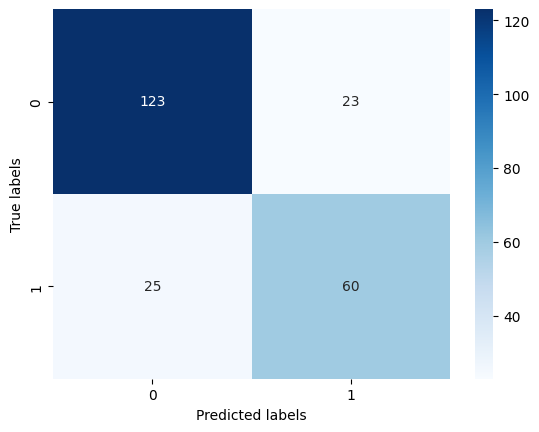

In [ ]:
pred_y=dt_model.predict(testx1)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(testy1, pred_y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#using kfold cross validation along with logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

#using bootstrap sampling

In [1]:
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv('/content/drive/MyDrive/datasets/featurization/pima-indians-diabetes.csv')

In [7]:
values=df1.values
n=500
stats=[]
for i in range(n):
  train=resample(values)
  test=np.array([x for x in values if x.tolist() not in train.tolist()])
  model=DecisionTreeClassifier()
  model.fit(train[:,:-1],train[:,-1])
  pred=model.predict(test[:,:-1])
  score=accuracy_score(test[:,-1],pred)
  print(score)
  stats.append(score)





0.6868686868686869
0.6420664206642066
0.6917808219178082
0.7118055555555556
0.6642335766423357
0.6925795053003534
0.6898954703832753
0.6713286713286714
0.6993006993006993
0.7174721189591078
0.7035714285714286
0.7208480565371025
0.7075812274368231
0.7077464788732394
0.6794425087108014
0.662020905923345
0.7127659574468085
0.6946564885496184
0.7103448275862069
0.6739130434782609
0.708185053380783
0.7006802721088435
0.6678832116788321
0.7038327526132404
0.65
0.6966666666666667
0.6678966789667896
0.6944444444444444
0.6618181818181819
0.6985294117647058
0.7095588235294118
0.6678445229681979
0.7118055555555556
0.6470588235294118
0.6458333333333334
0.7142857142857143
0.6376306620209059
0.7429577464788732
0.697841726618705
0.7167832167832168
0.6866197183098591
0.6968641114982579
0.6308243727598566
0.7013888888888888
0.6778523489932886
0.7265917602996255
0.7164179104477612
0.6840277777777778
0.6678700361010831
0.6933797909407665
0.7003257328990228
0.6750902527075813
0.7394366197183099
0.70714285


If a machine learning model has an accuracy range of 60% to 70% at a 95% confidence level, it means the following:

Accuracy Range: The model's accuracy is estimated to be somewhere between 60% and 70%. In other words, if you were to run the model multiple times on different datasets or subsets of data, you would expect the accuracy to fall within this range most of the time.

95% Confidence Level: The 95% confidence level is a measure of how confident you are in the accuracy range. It means that if you were to repeat the process of training and evaluating the model multiple times, you can expect the true accuracy of the model to fall within the stated range about 95% of the time. In statistical terms, this means you have a high level of confidence in the reported accuracy range.

In practical terms:

You can be reasonably confident that the model's accuracy is not lower than 60% and not higher than 70%.

There is still a 5% chance that the true accuracy might fall outside this range due to randomness or variability in the data. However, a 95% confidence level is a commonly accepted level of confidence in many statistical analyses.

It's important to note that a wider accuracy range (e.g., 60% to 70%) indicates greater uncertainty or variability in the model's performance, which could be due to factors like the complexity of the problem, the size and quality of the dataset, or the model's architecture.

In summary, a machine learning model with an accuracy range of 60% to 70% at a 95% confidence level suggests that you are reasonably confident in the reported accuracy, and you expect the true accuracy to fall within this range most of the time when evaluating the model on similar data.

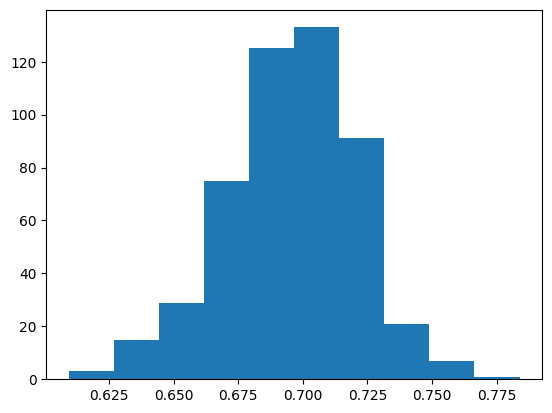

95.0 confidence interval 64.0% and 74.2%


In [8]:
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

the distribution of the accuracy is normal distribution

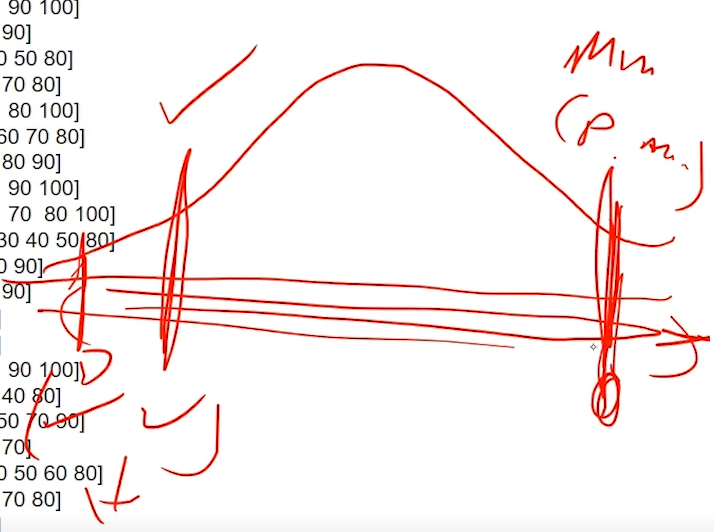

the range of 95 confidence level is found in this way
